In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/ProjectTerm_1188007

/content/drive/My Drive/ProjectTerm_1188007


In [ ]:
import io
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [ ]:

feature_count = len(df.columns)
print(f"Number of features: {feature_count}")


Number of features: 56


In [ ]:

df['label'].value_counts()

,count
label,
1,134850
0,100945


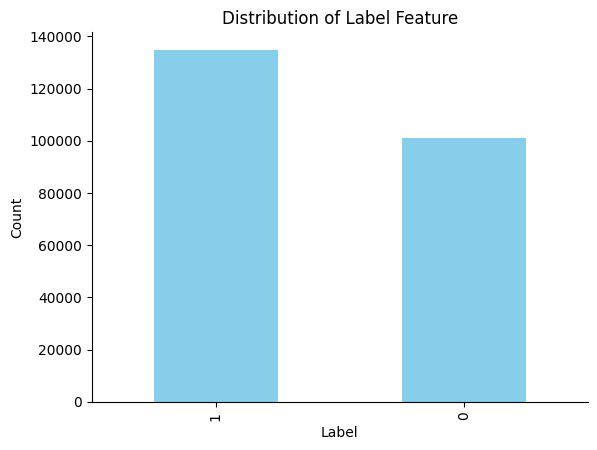

In [ ]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label Feature')
plt.show()

In [ ]:

print(list(df.columns))


['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


In [ ]:
df['TitleLength'] = df['Title'].str.len()


In [ ]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TitleLength
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,1,34,20,28,119,0,124,1,487
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,1,50,9,8,39,0,217,1,37
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,1,10,2,7,42,2,5,1,20
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,3,27,15,22,1,31,1,51
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,0,1,244,15,34,72,1,85,1,30


In [ ]:

df['TotalRef'] = df['NoOfSelfRef'] + df['NoOfEmptyRef'] + df['NoOfExternalRef']
df.head()


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TitleLength,TotalRef
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,1,34,20,28,119,0,124,1,487,243
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,1,50,9,8,39,0,217,1,37,256
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,1,10,2,7,42,2,5,1,20,49
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,3,27,15,22,1,31,1,51,54
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,244,15,34,72,1,85,1,30,158


In [ ]:
df.drop(['FILENAME', 'URL', 'Domain','URLLength', 'TLD', 'Title', "URLSimilarityIndex","CharContinuationRate",
    "TLDLegitimateProb","NoOfLettersInURL",
    "LetterRatioInURL",
    "NoOfDegitsInURL",
    "DegitRatioInURL",
    "NoOfOtherSpecialCharsInURL",
    "SpacialCharRatioInURL","NoOfExternalRef","NoOfSelfRef",
    "URLCharProb","IsHTTPS",
    "LineOfCode",
    "LargestLineLength","DomainTitleMatchScore",
    "URLTitleMatchScore", "DomainLength",
    "IsDomainIP",
    "TLDLength",
    "NoOfSubDomain",
    "HasObfuscation",
    "NoOfObfuscatedChar",
    "ObfuscationRatio",
    "NoOfEqualsInURL",
    "NoOfQMarkInURL",
    "NoOfAmpersandInURL",
    "Robots",
    "NoOfURLRedirect",
    "NoOfSelfRedirect",
    "HasExternalFormSubmit",
    "HasPasswordField",
    "Bank",
    "Pay",
    "Crypto",], axis=1, inplace=True)

In [ ]:
print(list(df.columns))

['HasTitle', 'HasFavicon', 'IsResponsive', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfEmptyRef', 'label', 'TitleLength', 'TotalRef']


In [ ]:
df.shape

(235795, 17)

Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df.drop('label', axis=1)
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


modelRF = RandomForestClassifier()
modelRF.fit(X_train_scaled, y_train)

y_pred = modelRF.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
[[15012    78]
 [   35 20245]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15090
           1       1.00      1.00      1.00     20280

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [ ]:
# Predicting on validation set
y_val_pred = modelRF.predict(X_val_scaled)

# Evaluating the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

#If want to evaluate on the test set too:
y_test_pred = modelRF.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9971161186349629

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15061
           1       1.00      1.00      1.00     20308

    accuracy                           1.00     35369
   macro avg       1.00      1.00      1.00     35369
weighted avg       1.00      1.00      1.00     35369


Confusion Matrix:
 [[14992    69]
 [   33 20275]]

Test Accuracy: 0.9968052021487136

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     15090
           1       1.00      1.00      1.00     20280

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370


Test Confusion Matrix:
 [[15012    78]
 [   35 20245]]


XGBoost Validation Accuracy

In [ ]:
import xgboost as xgb

xgmodel01 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgmodel01.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgmodel01.predict(X_test_scaled)

# Evaluating the model
xgscore = accuracy_score(y_test, y_pred)
print("Accuracy:", xgscore)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9957025728018094
Confusion Matrix:
[[14996    94]
 [   58 20222]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15090
           1       1.00      1.00      1.00     20280

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370



In [ ]:
# Predict on validation set
y_val_pred = xgmodel01.predict(X_val_scaled)

# Evaluating the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# If want to evaluate on the test set too:
y_test_pred = xgmodel01.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9959003647261726

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     15061
           1       1.00      1.00      1.00     20308

    accuracy                           1.00     35369
   macro avg       1.00      1.00      1.00     35369
weighted avg       1.00      1.00      1.00     35369


Confusion Matrix:
 [[14965    96]
 [   49 20259]]

Test Accuracy: 0.9957025728018094

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     15090
           1       1.00      1.00      1.00     20280

    accuracy                           1.00     35370
   macro avg       1.00      1.00      1.00     35370
weighted avg       1.00      1.00      1.00     35370


Test Confusion Matrix:
 [[14996    94]
 [   58 20222]]


In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42)
modelLR.fit(X_train_scaled, y_train)
y_pred = modelLR.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix:
[[14980   110]
 [  196 20084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15090
           1       0.99      0.99      0.99     20280

    accuracy                           0.99     35370
   macro avg       0.99      0.99      0.99     35370
weighted avg       0.99      0.99      0.99     35370



In [ ]:
# Predicting on validation set
y_val_pred = modelLR.predict(X_val_scaled)

# Evaluating the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# If want to evaluate on the test set too:
y_test_pred = modelLR.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9915462693319008

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15061
           1       0.99      0.99      0.99     20308

    accuracy                           0.99     35369
   macro avg       0.99      0.99      0.99     35369
weighted avg       0.99      0.99      0.99     35369


Confusion Matrix:
 [[14941   120]
 [  179 20129]]

Test Accuracy: 0.9913486005089058

Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15090
           1       0.99      0.99      0.99     20280

    accuracy                           0.99     35370
   macro avg       0.99      0.99      0.99     35370
weighted avg       0.99      0.99      0.99     35370


Test Confusion Matrix:
 [[14980   110]
 [  196 20084]]


In [ ]:
from sklearn.svm import SVC
modelSVM = SVC(kernel='linear', C=1.0)
modelSVM.fit(X_train_scaled, y_train)
y_pred = modelSVM.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
Confusion Matrix:
[[14976   114]
 [  138 20142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15090
           1       0.99      0.99      0.99     20280

    accuracy                           0.99     35370
   macro avg       0.99      0.99      0.99     35370
weighted avg       0.99      0.99      0.99     35370



In [ ]:
# Predicting on validation set
y_val_pred = modelSVM.predict(X_val_scaled)

# Evaluating the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# If want to evaluate on the test set too:
y_test_pred = modelSVM.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Validation Accuracy: 0.9929316633209873

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15061
           1       0.99      0.99      0.99     20308

    accuracy                           0.99     35369
   macro avg       0.99      0.99      0.99     35369
weighted avg       0.99      0.99      0.99     35369


Confusion Matrix:
 [[14935   126]
 [  124 20184]]

Test Accuracy: 0.9928753180661578

Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15090
           1       0.99      0.99      0.99     20280

    accuracy                           0.99     35370
   macro avg       0.99      0.99      0.99     35370
weighted avg       0.99      0.99      0.99     35370


Test Confusion Matrix:
 [[14976   114]
 [  138 20142]]


Deep Learning Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
modelDL = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
modelDL.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = modelDL.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model
loss, accuracy = modelDL.evaluate(X_test_scaled, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_prob = modelDL.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5158/5158 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9824 - loss: 0.0539 - val_accuracy: 0.9922 - val_loss: 0.0214
Epoch 2/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9923 - loss: 0.0224 - val_accuracy: 0.9935 - val_loss: 0.0186
Epoch 3/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9940 - val_loss: 0.0174
Epoch 4/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.9944 - val_loss: 0.0162
Epoch 5/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9945 - val_loss: 0.0166
Epoch 6/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9945 - val_loss: 0.0154
Epoch 7/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9941 - loss: 0.0205 - val_accuracy: 0.9944 - val_loss: 0.0156
Epoch 8/50
5158/5158 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9943 - loss: 0.0171 - val

In [ ]:

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.99


Saving the  models

In [ ]:
import joblib

# Save the models using joblib
joblib.dump(modelSVM, 'SVM_forHTML.pkl')
joblib.dump(modelRF, 'RF_forHTML.pkl')
joblib.dump(modelLR, 'LR_forHTML.pkl')
joblib.dump(xgmodel01, 'XG_forHTML.pkl')


['XG_forHTML.pkl']